# Elementos básicos del cluster analysis

En este "notebook" exploramos lo básico de cluster analysis con k-means

## Importar las librerías relevantes

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
# Utilizar los estilos de Seaborn
sns.set()
# Importar el módulo KMeans para usar k-means clustering con sklearn
from sklearn.cluster import KMeans

## cargar los datos

In [3]:
datos = pd.read_csv('Paises.csv')

In [4]:
# Darle un vistazo a los datos
datos.head()

,Country,Latitude,Longitude,Language
0,USA,44.97,-103.77,English
1,Canada,62.40,-96.80,English
2,France,46.75,2.40,French
3,UK,54.01,-2.53,English
4,Germany,51.15,10.40,German


## Graficar los datos

<function matplotlib.pyplot.show(close=None, block=None)>

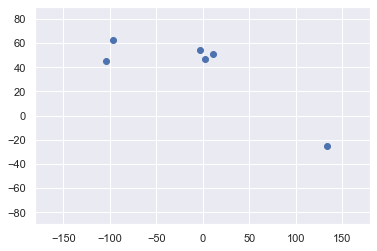

In [5]:
# Utilizar el código más simple posible para crear una gráfica de dispersión usando longitud y latitud
# Nótese que para obtener un resultado que se asemeje al mapa mundi, debemos usar la longitud como y, y la latitud como x

plt.scatter(datos['Longitude'],datos['Latitude'])

# Fijar límites a los ejes, a semejanza del mapa mundi

plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show

## Elegir los atributos (features) para agrupar por ubicación

In [6]:
x = datos.filter(["Latitude", "Longitude"])
x

,Latitude,Longitude
0,44.97,-103.77
1,62.40,-96.80
2,46.75,2.40
3,54.01,-2.53
4,51.15,10.40
5,-25.45,133.11


## Clustering

Esta es la parte donde empieza el agrupamiento

In [7]:
# Crear un objeto (que llamaremos kmeans)
# El número en los paréntesis es K, el número de grupos que deseamos

kmeans = KMeans(2)

In [8]:
# Ajustar o afinar el modelo con los datos de entrada (y el número de clusters especificados)

kmeans.fit(x)

d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

## Resultados del Clustering

Hay muchas formas de realizar esta parte, esta es una de las más ilustrativas

In [9]:
# Crear una variable que contenga los clusters que se han predicho para cada observación

clusters_identificados = kmeans.fit_predict(x)

# Revisar los resultados

clusters_identificados

d:\Archivos de programa\Python\3.10\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 0, 1])

In [10]:
# Crear una copia de los datos

datos_con_clusters = datos.copy()

# Crear una nueva serie, que tenga el cluster identificado para cada observación

datos_con_clusters['Cluster'] = clusters_identificados

# Revisar el resultado

datos_con_clusters

,Country,Latitude,Longitude,Language,Cluster
0,USA,44.97,-103.77,English,0
1,Canada,62.40,-96.80,English,0
2,France,46.75,2.40,French,0
3,UK,54.01,-2.53,English,0
4,Germany,51.15,10.40,German,0
5,Australia,-25.45,133.11,English,1


### Uso de Plotly Express para generar gráfica interactiva

In [11]:
#Graficar los datos utilizando la longitud y latitud
# color es un argumento que se puede codificar con una variable
# Todos los puntos en cada cluster tendran el mismo color

datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

fig = px.scatter(datos_con_clusters, 
                 x = "Longitude", 
                 y = "Latitude", 
                 color = "Cluster",
#                 size = '', 
                 hover_data = ['Country']
                )
fig.update_xaxes(range=[-180, 180])
fig.update_yaxes(range=[-90, 90])

fig.show()

### Y, si queremos con tres grupos???

Lo único que hay que hacer es cambiar el 2 por el 3 y repetir todos los pasos